In [1]:
using Revise
using Distributions
using SaferIntegers
using Plots
using LaTeXStrings
using Combinatorics
using DataFrames

In [2]:
function most_repeated_profile(num_players, num_actions, dtype=SafeInt64)
    prof = zeros(dtype, num_actions)
    for s = 1:num_players-1
        prof[(s-1) % num_actions + 1] += 1
    end
    return prof
end

most_repeated_profile (generic function with 2 methods)

In [3]:
signed_limits = DataFrame(strategies=Int[], most_players=Int[])
for num_actions = 2:20
    for num_players = 10:100
        prof = most_repeated_profile(num_players, num_actions)
        try
            repeats = multinomial(prof...)
        catch e
            if isa(e, OverflowError) || isa(e, InexactError)
                push!(signed_limits, (num_actions, num_players-1))
                break
            else
                rethrow(e)
            end
        end
    end
end
signed_limits

,strategies,most_players
,Int64,Int64
1,2,67
2,3,44
3,4,36
4,5,32
5,6,29
6,7,27
7,8,26
8,9,25
9,10,25


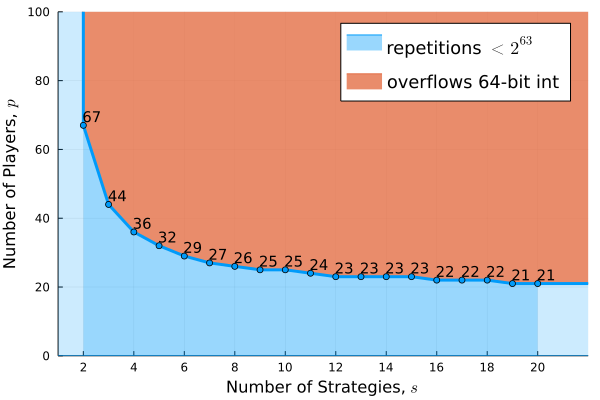

In [6]:
max_sizes = signed_limits[:,:most_players]
plot(xlims=(1,22), ylims=(0,100), xlabel=L"Number of Strategies, $s$", ylabel=L"Number of Players, $p$", legend_font_pointsize=12)
plot!(2:20, zeros(19), fillrange=max_sizes[1:19], seriescolor=1, label=L"repetitions $< 2^{63}$", fillalpha = 0.4)
plot!(20:22, zeros(3), fillrange=[max_sizes[end]; 21; 21], seriescolor=1, label="", fillalpha = 0.2)
plot!(1:2, zeros(2), fillrange=[999;999], seriescolor=1, label="", fillalpha = 0.2)
scatter!([0],[0], label=" ", ms=0, mc=:white, msc=:white)
plot!(1:22, [999; max_sizes; 21; 21], fillrange=ones(23)*999, seriescolor=2, label="overflows 64-bit int", fillalpha = 0.8)
plot!([2;2:20;999], [999; max_sizes; 21], linewidth=3, seriescolor=1, label="")
scatter!(2:20, max_sizes, series_annotations=[("$i", :left, :bottom, 10) for i in max_sizes], seriescolor=1, label="")
xticks!(2:2:20)
xticks!(2:2:20)
yticks!(0:20:100)
# savefig("../figures/int_overflow_thresholds.png")

In [5]:
unsigned_limits = DataFrame(strategies=Int[], most_players=Int[])
for num_actions = 2:20
    for num_players = 10:100
        prof = most_repeated_profile(num_players, num_actions, SafeUInt64)
        try
            repeats = multinomial(prof...)
        catch e
            if isa(e, OverflowError) || isa(e, InexactError)
                push!(unsigned_limits, (num_actions, num_players-1))
                break
            else
                rethrow(e)
            end
        end
    end
end
unsigned_limits

,strategies,most_players
,Int64,Int64
1,2,67
2,3,45
3,4,36
4,5,32
5,6,30
6,7,28
7,8,27
8,9,26
9,10,25


In [6]:
diffs = abs.(signed_limits[:,:most_players] .- unsigned_limits[:,:most_players])
println("largest difference between Int64 and UInt64: ", maximum(diffs))

largest difference between Int64 and UInt64: 1
